# Data Fetch Notebook Documentation

## Project Overview
This notebook aims to fetch data from a SQLite database containing necessary information for a dialect identification project. The dataset and the dialect identification problem were addressed by Qatar Computing Research.

## Objective
The main objectives of this notebook are:
- Retrieve data from different tables in the SQLite database.
- Prepare the retrieved data for further analysis and modeling.


In [1]:
import sqlite3
import pandas as pd
import numpy as np

## Dataset Description
The dataset is stored in a SQLite database file named `dialects_database.db`. It consists of the following tables:
1. `id_text`: Contains text data associated with each ID.
2. `id_dialect`: Contains dialect labels associated with each ID.

## Data Retrieval Process
1. **Connect to the Database:**
   - Establish a connection to the SQLite database file using the `sqlite3` library.

2. **Retrieve Table Names:**
   - Fetch the names of all tables present in the database using a SQL query.

3. **Retrieve Data from Tables:**
   - Extract data from the following tables:
     - `id_text`: Contains ID and corresponding text data.
     - `id_dialect`: Contains ID and associated dialect labels.

4. **Close Database Connection:**
   - Close the connection to the database once the data retrieval process is complete.

## Target Dialects
The project aims to identify dialects, and the target dialects are specified as 5.

## Summary
This notebook successfully retrieves the required data from the provided SQLite database, enabling further analysis and modeling tasks. The fetched data includes text data and associated dialect labels, essential for addressing the dialect identification problem.


In [ ]:
dbfile = '/content/dialects_database.db'
con = sqlite3.connect(dbfile)

cur = con.cursor()

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]


id_table = pd.read_sql("select * from id_text", con)

dialect_table = pd.read_sql("select * from id_dialect", con)

con.close()

In [7]:
import sqlite3
import csv

dbfile = '/content/dialects_database.db'
con = sqlite3.connect(dbfile)

cur = con.cursor()

# Fetch data from id_text table and write to CSV
cur.execute("SELECT * FROM id_text")
with open('id_text.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    writer.writerow([description[0] for description in cur.description])
    # Write the data
    for row in cur.fetchall():
        writer.writerow(row)

# Fetch data from id_dialect table and write to CSV
cur.execute("SELECT * FROM id_dialect")
with open('id_dialect.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    writer.writerow([description[0] for description in cur.description])
    # Write the data
    for row in cur.fetchall():
        writer.writerow(row)

con.close()


In [ ]:
print(table_list)


[('id_text',), ('id_dialect',)]


In [ ]:
print(dialect_table)


                         id dialect
0       1009754958479151232      LY
1       1009794751548313600      LY
2       1019989115490787200      LY
3       1035479791758135168      LY
4       1035481122921164800      LY
...                     ...     ...
147720   982775354405376000      SD
147721   980728852224860160      SD
147722   975502734668500992      SD
147723   980207908641263616      SD
147724   981080482380238848      SD

[147725 rows x 2 columns]


In [ ]:
print(id_table)


                         id                                               text
0       1009754958479151232  @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1       1009794751548313600  @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2       1019989115490787200  @smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3       1035479791758135168  @AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4       1035481122921164800  @lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
...                     ...                                                ...
147720   982775354405376000  الناس دي بتنفخ في قربة مقدودة بالدارجي كده  ال...
147721   980728852224860160  @Wail_Hamza @amiromer انت عايش وين بره السودان...
147722   975502734668500992  مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...
147723   980207908641263616  ياخي ديل ماخلو  للشيطان وإبليس شي لكن يروحو وي...
147724   981080482380238848     @abdomaged127 النبي فيك صدمتني ياخي عاوز تعويض

[147725 rows x 2 columns]


In [ ]:

# Assuming dialect_table and id_table are already loaded DataFrames
# Merging the two tables on the 'id' column
merged_table = pd.merge(dialect_table, id_table, on='id')


In [ ]:
merged_table

,id,dialect,text
0,1009754958479151232,LY,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1,1009794751548313600,LY,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2,1019989115490787200,LY,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3,1035479791758135168,LY,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4,1035481122921164800,LY,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
...,...,...,...
147720,982775354405376000,SD,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...
147721,980728852224860160,SD,@Wail_Hamza @amiromer انت عايش وين بره السودان...
147722,975502734668500992,SD,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...
147723,980207908641263616,SD,ياخي ديل ماخلو للشيطان وإبليس شي لكن يروحو وي...


In [ ]:
# Count the number of occurrences of each dialect
dialect_counts = merged_table['dialect'].value_counts()
dialect_counts

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64

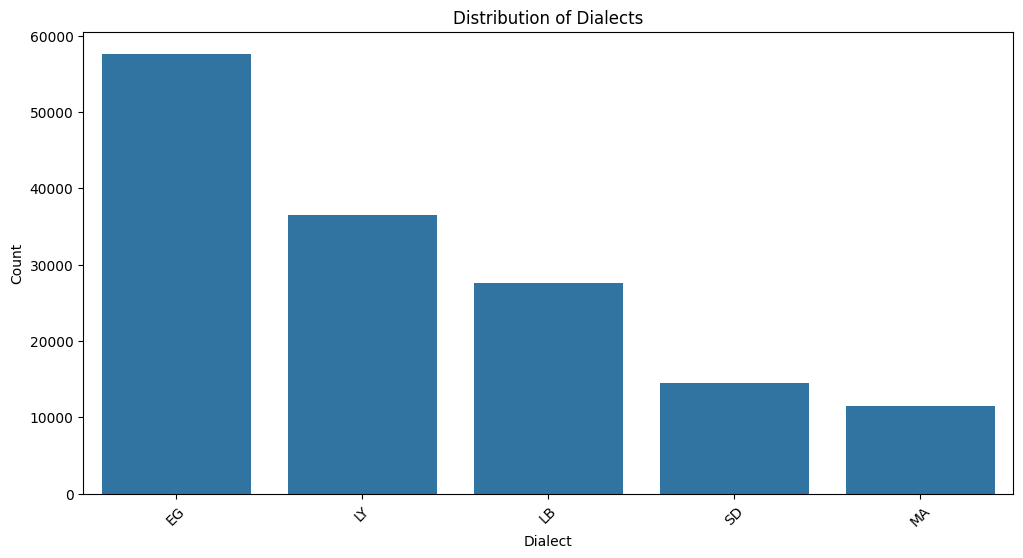

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of dialect counts
plt.figure(figsize=(12, 6))
sns.countplot(x='dialect', data=merged_table, order=dialect_counts.index)
plt.title('Distribution of Dialects')
plt.xlabel('Dialect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


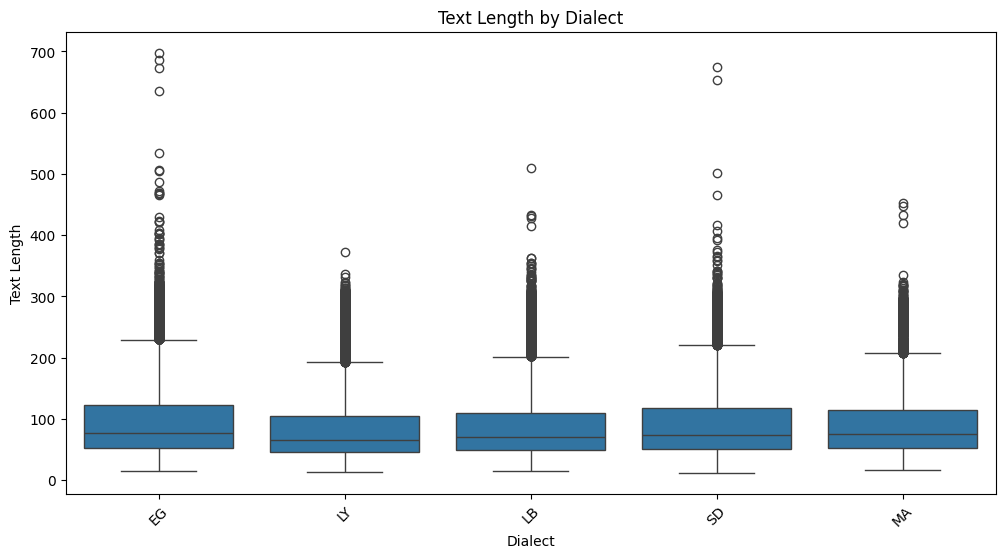

In [ ]:
# Add a column for text length
merged_table['text_length'] = merged_table['text'].apply(len)

# Box plot of text length by dialect
plt.figure(figsize=(12, 6))
sns.boxplot(x='dialect', y='text_length', data=merged_table, order=dialect_counts.index)
plt.title('Text Length by Dialect')
plt.xlabel('Dialect')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()


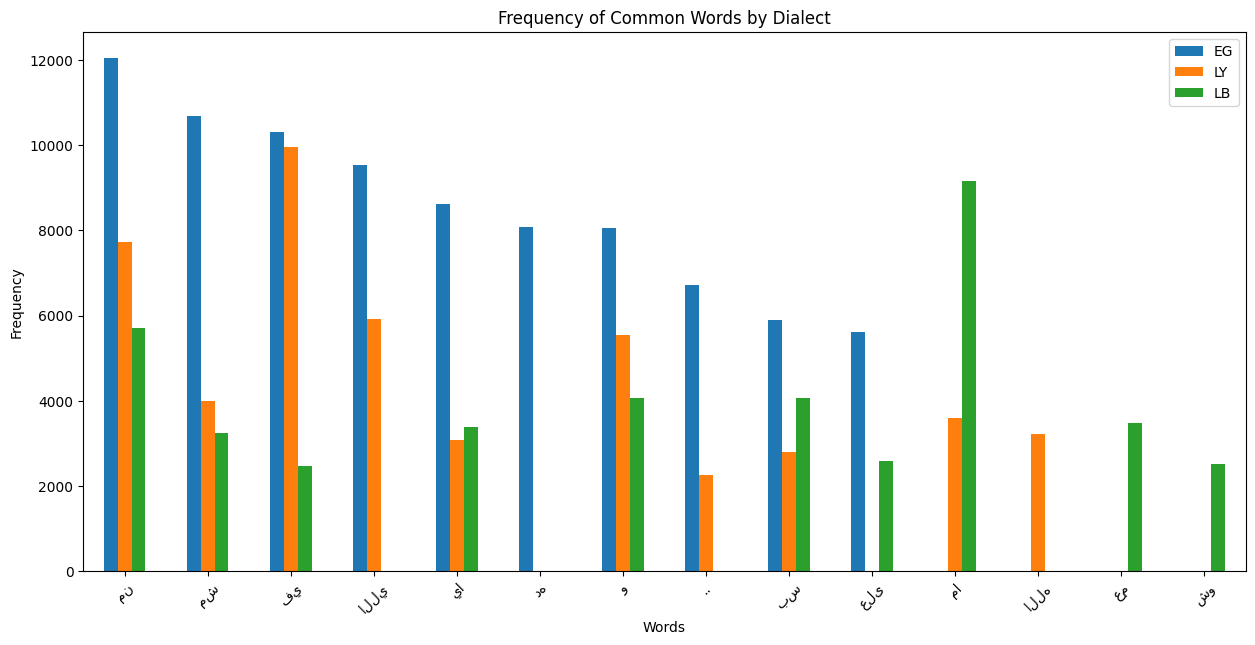

In [ ]:
from collections import Counter

# Tokenize the texts and count word frequencies by dialect
def get_word_freq(dialect):
    texts = merged_table[merged_table['dialect'] == dialect]['text']
    words = ' '.join(texts).split()
    return Counter(words)

# Get word frequencies for top 3 dialects
top_dialects = dialect_counts.index[:3]
word_freqs = {dialect: get_word_freq(dialect) for dialect in top_dialects}

# Create a DataFrame for the most common words in each dialect
common_words = pd.DataFrame({
    dialect: dict(word_freqs[dialect].most_common(10))
    for dialect in top_dialects
}).fillna(0)

# Plot the frequencies of common words
common_words.plot(kind='bar', figsize=(15, 7))
plt.title('Frequency of Common Words by Dialect')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os

font_path = '/content/DejaVuSans.ttf'
print(os.path.exists(font_path))

True


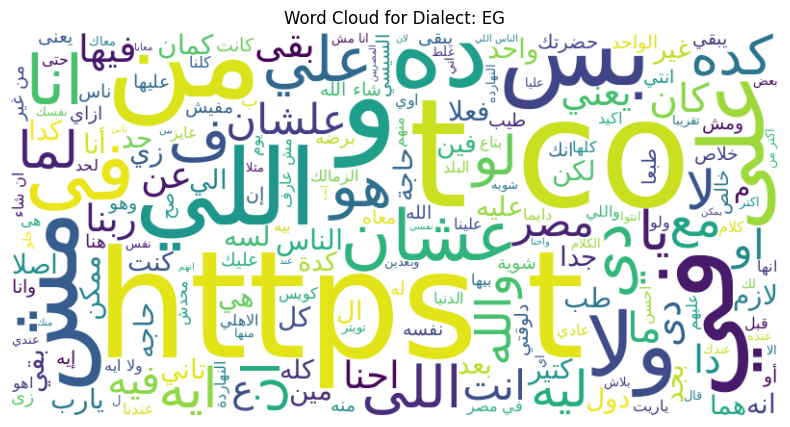

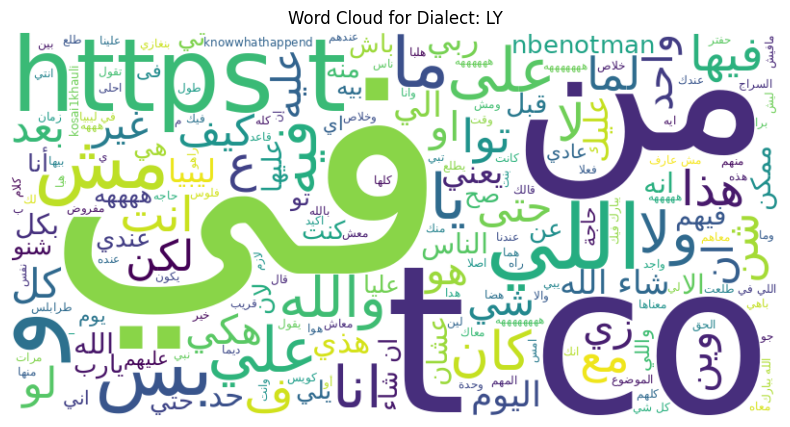

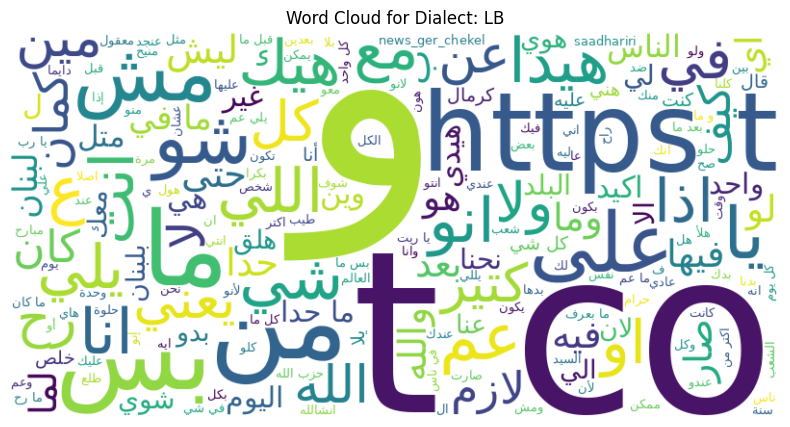

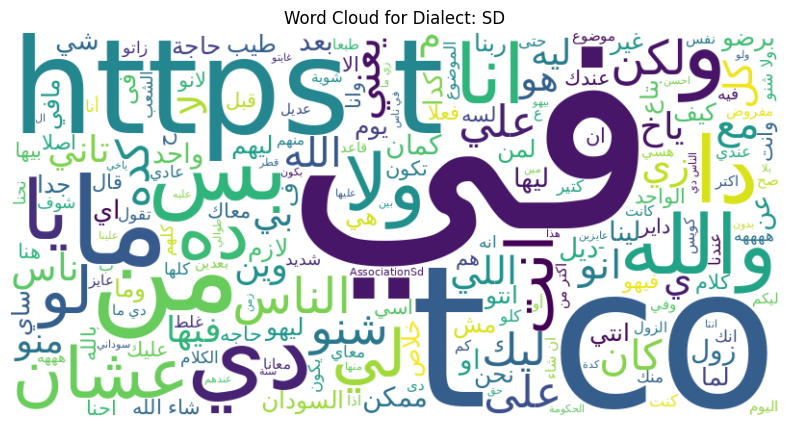

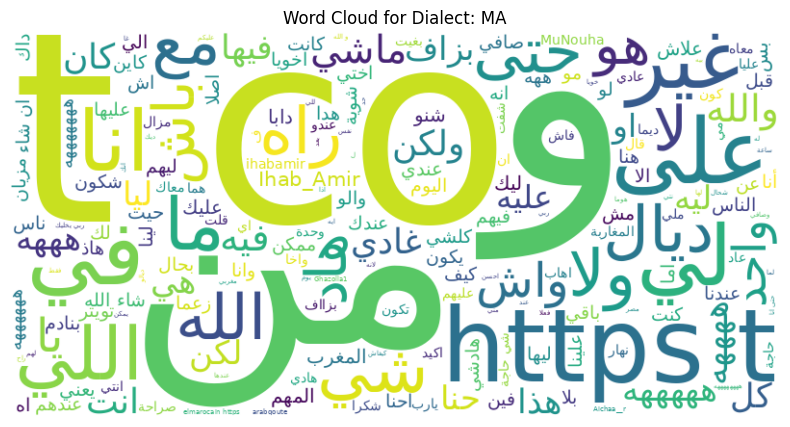

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# Path to the DejaVu Sans font file
font_path = '/content/DejaVuSans.ttf'

# Verify if the font path is correct
if not os.path.exists(font_path):
    raise OSError(f"Font file not found at {font_path}")

# Function to create and display the word cloud for a specific dialect
def create_wordcloud(dialect):
    text = ' '.join(merged_table[merged_table['dialect'] == dialect]['text'])
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Dialect: {dialect}')
    plt.axis('off')
    plt.show()

# Create word clouds for each dialect individually
for dialect in dialect_counts.index:
    create_wordcloud(dialect)


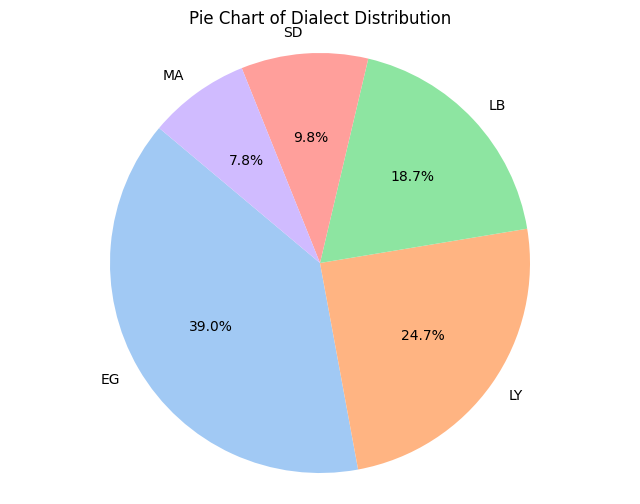

In [ ]:
# Example pie chart for 'dialect' column
plt.figure(figsize=(8, 6))
dialect_counts = dialect_table['dialect'].value_counts()
plt.pie(dialect_counts, labels=dialect_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Pie Chart of Dialect Distribution')
plt.axis('equal')
plt.show()
